In [26]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

In [27]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outputLayerNeurons = 1

        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outputLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.sigmoid(self.output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)

        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

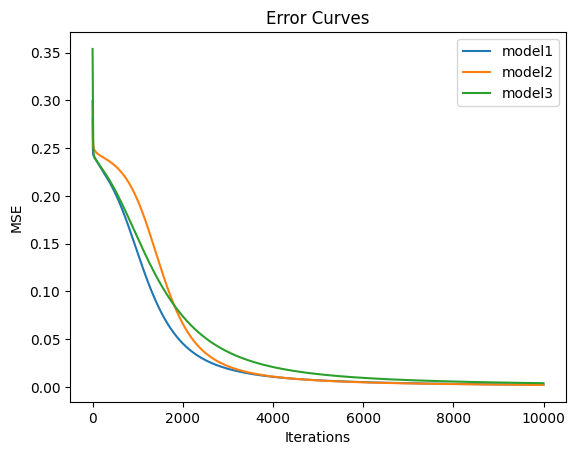

In [28]:
model1 = NeuralNetwork()
model2 = NeuralNetwork()
model3 = NeuralNetwork()
error1 = []
error2 = []
error3 = []
for i in range(10000):
    model1.train(X, Y)
    model2.train(X, Y)
    model3.train(X, Y)

    error1.append(np.mean(np.square(Y - model1.feedForward(X))))
    error2.append(np.mean(np.square(Y - model2.feedForward(X))))
    error3.append(np.mean(np.square(Y - model3.feedForward(X))))

plt.plot(error1, label='model1')
plt.plot(error2, label='model2')
plt.plot(error3, label='model3')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Error Curves')
plt.legend()
plt.show()

**The error curve shows how the models' mistakes (MSE) decrease as they learn. At the start, the MSE is high, but it drops quickly as the models improve. After about 2000 iterations, the MSE levels off, meaning the models are getting close to making the best predictions they can. All three models learn in a similar way, with model1 having the lowest final error, followed by model3 and model2. This shows that the models are learning and getting better over time.**

In [29]:
print("model1 Predictions:")
print(model1.feedForward([0, 0]))
print(model1.feedForward([1, 1]))
print(model1.feedForward([1, 0]))
print(model1.feedForward([0, 1]))

def evaluate_model(model1, X, Y):
    predictions = np.round(model1.feedForward(X))
    accuracy = accuracy_score(Y, predictions)
    precision = precision_score(Y, predictions)
    recall = recall_score(Y, predictions)
    f1 = f1_score(Y, predictions)

    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = evaluate_model(model1, X, Y)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nmodel2 Predictions:")
print(model2.feedForward([0, 0]))
print(model2.feedForward([1, 1]))
print(model2.feedForward([1, 0]))
print(model2.feedForward([0, 1]))

def evaluate_model(model2, X, Y):
    predictions = np.round(model2.feedForward(X))
    accuracy = accuracy_score(Y, predictions)
    precision = precision_score(Y, predictions)
    recall = recall_score(Y, predictions)
    f1 = f1_score(Y, predictions)

    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = evaluate_model(model2, X, Y)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nmodel3 Predictions:")
print(model3.feedForward([0, 0]))
print(model3.feedForward([1, 1]))
print(model3.feedForward([1, 0]))
print(model3.feedForward([0, 1]))

def evaluate_model(model3, X, Y):
    predictions = np.round(model3.feedForward(X))
    accuracy = accuracy_score(Y, predictions)
    precision = precision_score(Y, predictions)
    recall = recall_score(Y, predictions)
    f1 = f1_score(Y, predictions)

    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = evaluate_model(model3, X, Y)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

model1 Predictions:
[0.05285688]
[0.04283578]
[0.95335457]
[0.95587195]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

model2 Predictions:
[0.04072985]
[0.04856581]
[0.95585799]
[0.95312354]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

model3 Predictions:
[0.05908607]
[0.06371845]
[0.93712697]
[0.93775026]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


**The predictions from all three models (model1, model2, and model3) show values close to either 0 or 1, as expected for a binary classification task. For inputs like [0,0] and [1,1] the models predict values near 0, and for inputs like [0,1] and [1,0], the predictions are close to 1. This indicates that the models are correctly classifying the XOR data.All three models achieved perfect scores in terms of performance metrics: Accuracy, Precision, Recall, and F1 Score are all 1.0. This means that the models made no mistakes, predicted correctly for all test cases, and handled both classes (0 and 1) equally well. The results show that the models learned the XOR pattern perfectly and gave accurate predictions for the test data.**